In [8]:
import GOES as GOES
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import netCDF4 as nc
import xarray as xr
import pandas as pd

from os import listdir
from os.path import isfile, join
# import cartopy.crs as ccrs
import numpy as np
# from cartopy.feature import NaturalEarthFeature
%run "../Utilities.ipynb"
# import import_ipynb
# import DownloadGoes.Utilities as util

Derived motion winds are available hourly (the full disk) for the bands 2,7,8,9,10 and 14, (central wavelengths 0.64, 3.89, 6.17, 6.93, 7.34, and 11.19 um)

In [29]:
# download the data
flist_dm = GOES.download('goes16', 'ABI-L2-DMWF', # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
                      DateTimeIni = '20200102-153000', DateTimeFin = '20200102-163000', 
                      path_out='./../data/raw_data')
# download the data
flist_cth = GOES.download('goes16', 'ABI-L2-ACHAF', # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
                      DateTimeIni = '20200102-153000', DateTimeFin = '20200102-155000', 
                      path_out='./../data/raw_data')

flist_cod = GOES.download('goes16', 'ABI-L2-CODF', # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
                      DateTimeIni = '20200102-153000', DateTimeFin = '20200102-155000', 
                      path_out='./../data/raw_data')

Files:
  OR_ABI-L2-DMWF-M6C02_G16_s20200021600218_e20200021609526_c20200021625104.nc 100% 103.1MB 4m57s
  OR_ABI-L2-DMWF-M6C07_G16_s20200021600218_e20200021609537_c20200021623005.nc 100% 5.2MB 2s
  OR_ABI-L2-DMWF-M6C08_G16_s20200021600218_e20200021609526_c20200021623021.nc 100% 8.7MB 4s
  OR_ABI-L2-DMWF-M6C09_G16_s20200021600218_e20200021609531_c20200021642488.nc 100% 9.3MB 4s
  OR_ABI-L2-DMWF-M6C10_G16_s20200021600218_e20200021609537_c20200021642477.nc 100% 10.8MB 5s
  OR_ABI-L2-DMWF-M6C14_G16_s20200021600218_e20200021609526_c20200021624436.nc 100% 6.2MB 3s
Files:
  OR_ABI-L2-ACHAF-M6_G16_s20200021530218_e20200021539526_c20200021541370.nc 100% 1.5MB 1s
  OR_ABI-L2-ACHAF-M6_G16_s20200021540218_e20200021549526_c20200021551491.nc 100% 1.5MB 1s
Files:
  OR_ABI-L2-CODF-M6_G16_s20200021530218_e20200021539526_c20200021541446.nc 100% 7.4MB 7s
  OR_ABI-L2-CODF-M6_G16_s20200021540218_e20200021549526_c20200021551591.nc 100% 7.4MB 13s


In [4]:
# files = flist_dm
path = './../data/'
files = [path + f for f in listdir(path) if (isfile(join(path, f)) and 'DMWF' in f)]

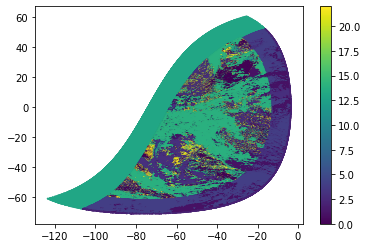

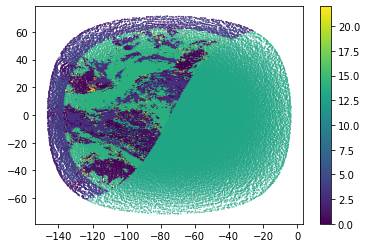

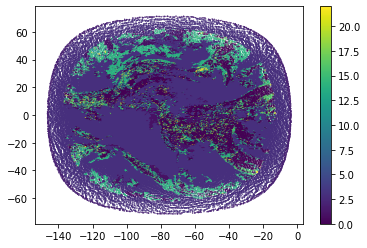

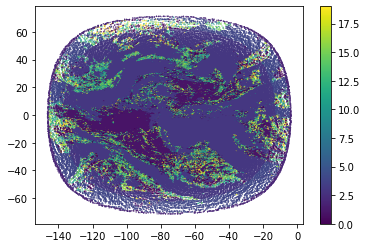

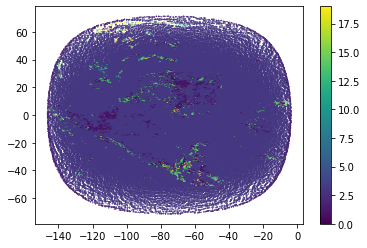

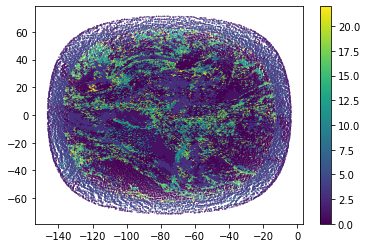

In [222]:
# for file in files:
#     ds = xr.open_dataset(file)
#     plt.scatter(ds.lon, ds.lat, c = ds.DQF, s = .1)
#     plt.colorbar()
#     plt.show()

In [5]:
dss = []
for file in files:
    ds = xr.open_dataset(file)

    nMeasures = ds.nMeasures[(ds.lon< -30) & (ds.lon> -50) & (ds.lat > -5.0) & (ds.lat < 15.0 )]
    ds_small = ds[dict(nMeasures=nMeasures)]
    dss.append(ds_small)

file_cod = flist_cod[0]
file_cth = flist_cth[0]
ds = xr.open_dataset(files[2])
ds

<xarray.Dataset>
Dimensions:                                                     (atmospheric_layer: 3, dmw_band: 1, nMeasures: 170359, number_atmospheric_layer_bounds: 2, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2)
Coordinates:
    lat                                                         (nMeasures) float64 ...
    lon                                                         (nMeasures) float64 ...
    time                                                        (nMeasures) datetime64[ns] ...
    pressure                                                    (nMeasures) float32 ...
    local_zenith_angle                                          (nMeasures) float32 ...
    solar_zenith_angle                                          (nMeasures) float32 ...
    lat_image                                                   float32 ...
    lon_image                                                   float32 ...
    retrieval_local_zenith_angle                                float32 ...
    atmospheric_layer_pressure                                  (atmospheric_layer) float32 ...
    band_id                                                     (dmw_band) int8 ...
    band_wavelength                                             (dmw_band) float32 ...
Dimensions without coordinates: atmospheric_layer, dmw_band, nMeasures, number_atmospheric_layer_bounds, number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/35)
    wind_speed                                                  (nMeasures) float32 ...
    wind_direction                                              (nMeasures) float32 ...
    temperature                                                 (nMeasures) float32 ...
    DQF                                                         (nMeasures) float32 ...
    lat_image_bounds                                            (number_of_image_bounds) float32 ...
    lon_image_bounds                                            (number_of_image_bounds) float32 ...
    ...                                                          ...
    percent_uncorrectable_GRB_errors                            float32 ...
    percent_uncorrectable_L0_errors                             float32 ...
    algorithm_dynamic_input_data_container                      int32 ...
    processing_parm_version_container                           int32 ...
    algorithm_product_version_container                         int32 ...
    solar_zenith_angle_bounds                                   (number_of_SZA_bounds) float32 ...
Attributes: (12/34)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    standard_name:             solar_zenith_angle
    units:                     degree
    bounds:                    solar_zenith_angle_bounds
    dataset_name:              OR_ABI-L2-DMWF-M6C08_G16_s20200021100218_e2020...
    spatial_resolution:        10km at nadir
    id:                        5f758950-f8a8-4d19-950d-d2cbafcd6313

In [ ]:
cth = xr.open_dataset(file_cth)
plt.imshow(cth.HT)
cth

In [7]:
image = makeXArrayFromNetCDFs(file_cod, file_cth)
image

<xarray.Dataset>
Dimensions:  (x: 535, y: 430)
Coordinates:
    lon      (x, y) float32 -50.0 -49.95 -49.91 -49.87 ... -29.91 -29.85 -29.79
    lat      (x, y) float32 15.0 15.0 15.0 15.0 ... -5.12 -5.121 -5.122 -5.122
  * x        (x) float64 0.0 0.001873 0.003745 0.005618 ... 0.9963 0.9981 1.0
  * y        (y) float64 0.0 0.002331 0.004662 0.006993 ... 0.9953 0.9977 1.0
    time     datetime64[ns] 2020-01-02T10:35:07.202929024
Data variables:
    cod      (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    dqf_cod  (x, y) float32 6.0 6.0 6.0 6.0 6.0 6.0 ... 6.0 6.0 6.0 6.0 6.0 6.0
    cth      (x, y) float32 nan nan 185.9 185.9 nan nan ... nan nan nan nan nan
Attributes:
    extent:   [-50.0, -30.0, -5.0, 15.0]

In [6]:
image = rawDatatoClassification(flist_cth, flist_cod, output_loc = '../output/')
image

<xarray.Dataset>
Dimensions:  (x: 535, y: 430)
Coordinates:
    lon      (x, y) float32 -50.0 -49.95 -49.91 -49.87 ... -29.91 -29.85 -29.79
    lat      (x, y) float32 15.0 15.0 15.0 15.0 ... -5.12 -5.121 -5.122 -5.122
  * x        (x) float64 0.0 0.001873 0.003745 0.005618 ... 0.9963 0.9981 1.0
  * y        (y) float64 0.0 0.002331 0.004662 0.006993 ... 0.9953 0.9977 1.0
    time     datetime64[ns] 2020-01-02T10:45:07.202625024
Data variables:
    cod      (x, y) float32 nan nan nan nan 15.15 nan ... nan nan nan nan nan
    dqf_cod  (x, y) float32 6.0 6.0 6.0 6.0 4.0 6.0 ... 0.0 6.0 6.0 6.0 6.0 6.0
    cth      (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    ct       (x, y) int32 1 1 1 1 0 1 1 1 1 1 1 1 1 ... 4 4 4 4 4 4 4 1 1 1 1 1
Attributes:
    extent:   [-50.0, -30.0, -5.0, 15.0]

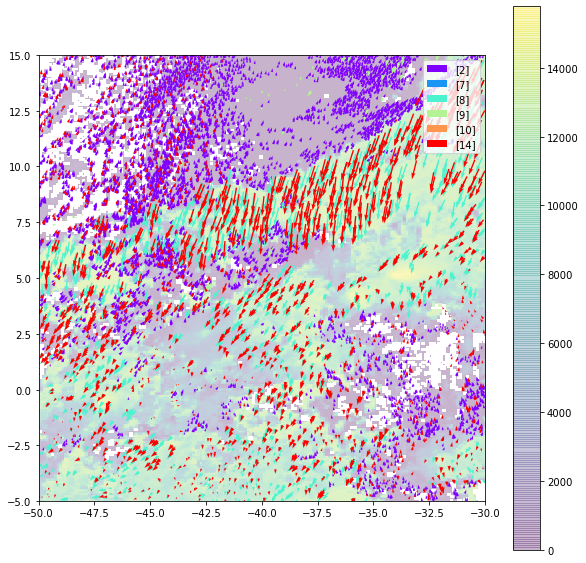

In [11]:
plt.figure(figsize = (10,10))
plt.imshow(image.cth, extent = image.extent, alpha = .3)
plt.colorbar()

colors = cm.rainbow(np.linspace(0, 1, len(dss)))

for ds, c in zip(dss, colors):

    u = ds.wind_speed * np.cos(np.radians(ds.wind_direction))
    v = ds.wind_speed * np.sin(np.radians(ds.wind_direction))
#     c = ds.pressure
    
    plt.quiver(ds.lon,ds.lat, u, v,
              scale = 1000, 
              width = 0.003,
              color = c, 
              label = ds.band_id.data)
plt.legend()
plt.savefig('../fig/example_derived_mw.png')
plt.show()

In [7]:
## Interpolation

# Nearest neighbours
ds = xr.concat(dss, 'nMeasures')
nMeasures = ds.nMeasures[~(np.isnan(ds.wind_speed))]
ds_wind = ds[dict(nMeasures=nMeasures)]
ds_wind

<xarray.Dataset>
Dimensions:                                                     (atmospheric_layer: 3, dmw_band: 1, nMeasures: 10001, number_atmospheric_layer_bounds: 2, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2)
Coordinates:
    lat                                                         (nMeasures) float64 ...
    lon                                                         (nMeasures) float64 ...
    time                                                        (nMeasures) datetime64[ns] ...
    pressure                                                    (nMeasures) float32 ...
    local_zenith_angle                                          (nMeasures) float32 ...
    solar_zenith_angle                                          (nMeasures) float32 ...
    lat_image                                                   float32 0.0
    lon_image                                                   float32 -75.0
    retrieval_local_zenith_angle                                float32 90.0
    atmospheric_layer_pressure                                  (atmospheric_layer) float32 ...
    band_id                                                     (nMeasures, dmw_band) int8 ...
    band_wavelength                                             (nMeasures, dmw_band) float32 ...
Dimensions without coordinates: atmospheric_layer, dmw_band, nMeasures, number_atmospheric_layer_bounds, number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/35)
    wind_speed                                                  (nMeasures) float32 ...
    wind_direction                                              (nMeasures) float32 ...
    temperature                                                 (nMeasures) float32 ...
    DQF                                                         (nMeasures) float32 ...
    lat_image_bounds                                            (nMeasures, number_of_image_bounds) float32 ...
    lon_image_bounds                                            (nMeasures, number_of_image_bounds) float32 ...
    ...                                                          ...
    percent_uncorrectable_GRB_errors                            (nMeasures) float64 ...
    percent_uncorrectable_L0_errors                             (nMeasures) float64 ...
    algorithm_dynamic_input_data_container                      (nMeasures) int32 ...
    processing_parm_version_container                           (nMeasures) int32 ...
    algorithm_product_version_container                         (nMeasures) int32 ...
    solar_zenith_angle_bounds                                   (nMeasures, number_of_SZA_bounds) float32 ...
Attributes: (12/34)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    standard_name:             solar_zenith_angle
    units:                     degree
    bounds:                    solar_zenith_angle_bounds
    dataset_name:              OR_ABI-L2-DMWF-M6C02_G16_s20200021100218_e2020...
    spatial_resolution:        10km at nadir
    id:                        931e859a-eac9-445a-bc86-9aa303a26664

In [23]:
from scipy.interpolate import NearestNDInterpolator

rng = np.random.default_rng()
x = rng.random(10) - 0.5
y = rng.random(10) - 0.5
z = np.hypot(x, y)
X = np.linspace(min(x), max(x))
Y = np.linspace(min(y), max(y))


x = ds_wind.lon
y = ds_wind.lat
z = ds_wind.wind_speed * np.exp(1j * ds_wind.wind_direction / 180 * np.pi)

X, Y = image.lon, image.lat
interp = NearestNDInterpolator(list(zip(x, y)), z)
Z = interp(X, Y)

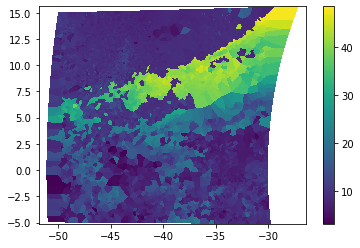

In [17]:
plt.pcolormesh(X, Y, Z.abs(), shading='auto')
plt.colorbar()
plt.axis("equal")
plt.show()

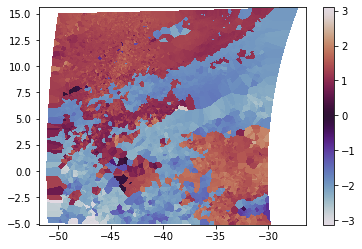

In [28]:
plt.pcolormesh(X, Y, np.angle(Z), shading='auto' , cmap = 'twilight')
plt.colorbar()
plt.axis("equal")
plt.show()

96729